#Practice Lab
This project will be for practicing basic image classification in Keras

#Loading Data

In [ ]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist
x_train, y_train = x_train_full[:-5000], y_train_full[:-5000]
x_valid, y_valid = x_train_full[-5000:], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape

(55000, 28, 28)

In [ ]:
x_train.dtype

dtype('uint8')

In [ ]:
x_train, x_valid, x_test = x_train / 255., x_valid / 255., x_test / 255.

#Creating Label Class Names


In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

#Model Creation

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

#Compilation

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

#Training and Evaluation

In [ ]:
history = model.fit(x_train, y_train, epochs=30,
                    validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6910 - loss: 0.9978 - val_accuracy: 0.8286 - val_loss: 0.5004
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8266 - loss: 0.5043 - val_accuracy: 0.8378 - val_loss: 0.4520
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8428 - loss: 0.4516 - val_accuracy: 0.8470 - val_loss: 0.4279
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8533 - loss: 0.4219 - val_accuracy: 0.8506 - val_loss: 0.4140
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8601 - loss: 0.4010 - val_accuracy: 0.8540 - val_loss: 0.4032
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8650 - loss: 0.3843 - val_accuracy: 0.8570 - val_loss: 0.3950
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8699 - loss: 0.3704 - val_accuracy: 0.8594 - val_loss: 0.3875
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8736 - loss: 0.3583 -

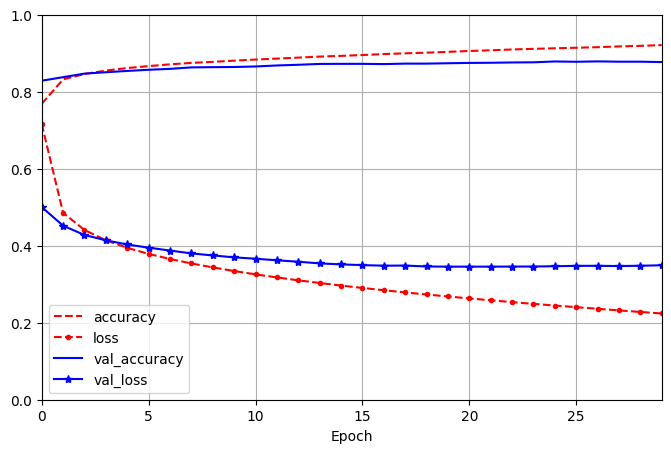

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8,5), xlim=[0,29], ylim=[0,1], grid=True, xlabel='Epoch',
    style=['r--','r--.','b-','b-*']
)
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8699 - loss: 0.3724


[0.3725036382675171, 0.8719000220298767]

#Model Predictions

In [ ]:
x_new = x_test[:3]
y_prob = model.predict(x_new)
y_prob.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.02, 0.  , 0.74],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
import numpy as np
y_pred = y_prob.argmax(axis=-1)
print(y_pred)
np.array(class_names)[y_pred]

[9 2 1]


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)